In [1]:
import random

import torch
from torch import FloatTensor
from torch.distributions import Beta
import numpy as np
from bindsnet.network import Network
from bindsnet.network.nodes import Input, LIFNodes
from bindsnet.learning.learning import MSTDPET, PostPre, NoOp
from bindsnet.network.topology import Connection
from bindsnet.network.monitors import Monitor
import matplotlib.pyplot as plt

from libs.learning import PostPreInh, MSTDPET_SEASONAL, MSTDP_SEASONAL, RSTDP_SEASONAL, AbstractSeasonalLearning
from libs.second_appr_simp_t2 import CorticalColumn, LayerConnection, ComplexStructure, LAYER_23, LAYER_4
from libs.connections import ConnectionWithConvergence, RandomConnection, MaxPool1dConnection, get_output_size_maxpool1d, BackwardConnections

In [2]:
connection_for_test = BackwardConnections

In [3]:
post_synaptic_args = {
    'tc_trace': 10,
    'tc_decay': 10,
}
connection_args = {
    'potential_percent': Beta(3, 40),
    'before_computation_delay': 0,
    'after_computation_delay': 0,
    'connection_rate': 0.5,
    'enable': True,
}


# 1:1 Test

In [4]:
intervals = 10
time = 100
spike_train = torch.tensor(list(range(time))) % intervals == 0

In [5]:
pre_synaptic = Input(1)
post_synaptic = LIFNodes(1, **post_synaptic_args)
connection = connection_for_test(pre_synaptic, post_synaptic, **connection_args)

torch.Size([1, 1]) tensor([[0.0828]])
torch.Size([1, 1]) tensor([[1.]])


In [6]:
connection

BackwardConnections(
  (source): Input()
  (target): LIFNodes()
)

In [7]:
post_synaptic_monitor = Monitor(obj=post_synaptic, state_vars=['v', 's'])
connection_monitor = Monitor(obj=connection, state_vars=['w'])

In [8]:
network = Network(dt=1.0)
network.add_layer(pre_synaptic, "pre")
network.add_layer(post_synaptic, "post")
network.add_connection(connection, "pre", "post")
network.add_monitor(post_synaptic_monitor, "post")
network.add_monitor(connection_monitor, "connection")

In [9]:
network.run(inputs={'pre': spike_train.view(time, -1)}, time=time)

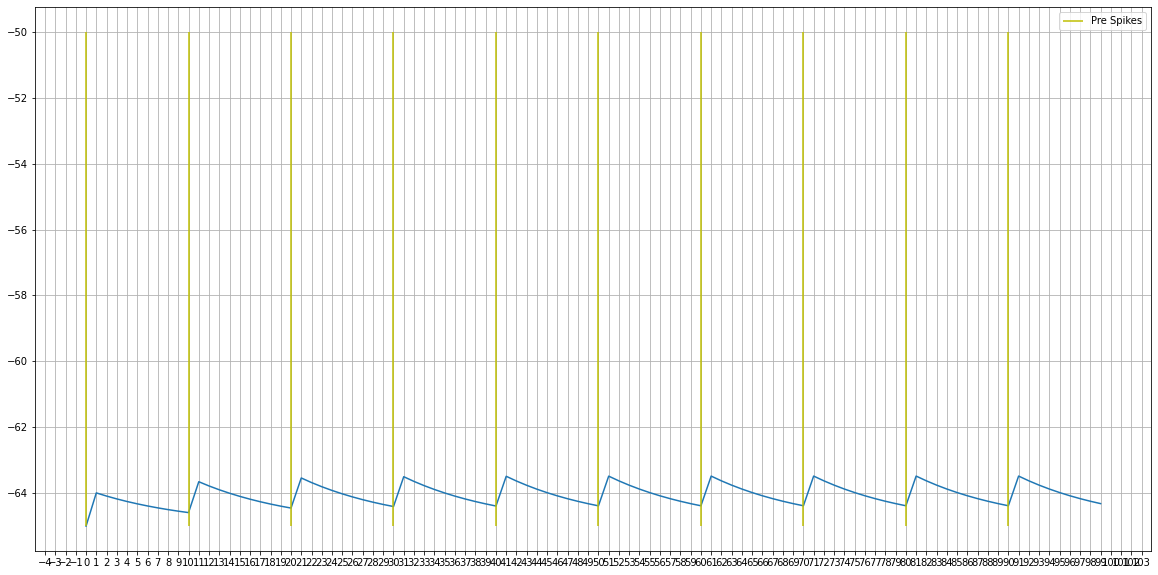

In [10]:
import matplotlib.ticker as plticker
voltages = post_synaptic_monitor.get('v')[:,0,0]
fig,ax=plt.subplots(figsize = (20, 10))
loc = plticker.MultipleLocator(base=1.0)
ax.xaxis.set_major_locator(loc)

ax.plot(range(time), voltages)

lst = post_synaptic_monitor.get('s')[:,0,0].nonzero(as_tuple=True)[0].tolist()
if len(lst) > 0:
    ax.vlines(x=lst, color='r', ymin=-65, ymax=-50, label = 'Post spikes')

lst = spike_train.nonzero(as_tuple=True)[0].tolist()
if len(lst) > 0:
    ax.vlines(x=lst, color='y', ymin=-65, ymax=-50, label = 'Pre Spikes')

ax.grid(which='major', axis='both', linestyle='-')
ax.legend()

# 5:10 Test

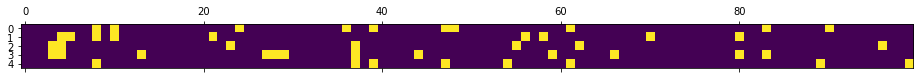

In [11]:
time = 100
spike_train = torch.rand(time, 5) < 0.1
plt.matshow(spike_train.T)

In [12]:
pre_synaptic = Input(5)
post_synaptic = LIFNodes(10, **post_synaptic_args)
connection = connection_for_test(pre_synaptic, post_synaptic, **connection_args)

torch.Size([5, 10]) tensor([[0.0852, 0.0265, 0.0813, 0.1064, 0.0466, 0.0615, 0.0455, 0.1030, 0.1271,
         0.1404],
        [0.0201, 0.1975, 0.1299, 0.0260, 0.0944, 0.0427, 0.0740, 0.1377, 0.0392,
         0.0291],
        [0.0878, 0.0460, 0.0649, 0.1699, 0.0214, 0.0816, 0.0891, 0.0696, 0.1011,
         0.0493],
        [0.1144, 0.0155, 0.0435, 0.0234, 0.1190, 0.0795, 0.0508, 0.1238, 0.0368,
         0.0490],
        [0.0585, 0.0652, 0.0135, 0.1019, 0.0187, 0.0453, 0.1240, 0.0640, 0.0611,
         0.0296]])
torch.Size([5, 10]) tensor([[0., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
        [0., 1., 0., 0., 0., 1., 1., 0., 0., 0.],
        [1., 0., 0., 1., 1., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 1., 0., 0.],
        [0., 0., 1., 0., 0., 1., 0., 0., 1., 1.]])


In [13]:
post_synaptic_monitor = Monitor(obj=post_synaptic, state_vars=['v', 's'])
connection_monitor = Monitor(obj=connection, state_vars=['w'])

In [14]:
network = Network(dt=1.0)
network.add_layer(pre_synaptic, "pre")
network.add_layer(post_synaptic, "post")
network.add_connection(connection, "pre", "post")
network.add_monitor(post_synaptic_monitor, "post")
network.add_monitor(connection_monitor, "connection")

In [15]:
network.run(inputs={'pre': spike_train}, time=time)

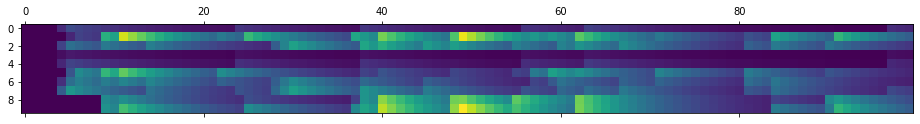

In [16]:
plt.matshow(post_synaptic_monitor.get('v')[:,0,:].T)

In [17]:
post_synaptic_monitor.get('v')[:,0,0]

tensor([-65.0000, -65.0000, -65.0000, -65.0000, -64.4805, -64.0312, -64.1234,
        -64.2068, -64.2823, -64.3506, -64.4124, -64.4683, -64.5189, -64.5647,
        -64.6061, -64.6436, -64.6775, -64.7082, -64.7360, -64.7611, -64.7838,
        -64.8044, -64.8230, -64.8399, -64.3420, -64.4046, -64.4613, -64.5125,
        -64.5589, -64.6009, -64.6389, -64.6732, -64.7043, -64.7325, -64.7579,
        -64.7810, -64.8018, -64.8207, -64.3254, -64.3896, -64.4477, -64.5003,
        -64.5478, -64.5908, -64.6298, -64.6650, -64.6969, -64.7257, -64.7518,
        -64.7754, -64.7968, -64.8161, -64.8336, -64.8495, -64.8638, -64.8768,
        -64.3739, -64.4335, -64.4874, -64.5362, -64.5803, -64.6203, -64.6564,
        -64.1833, -64.2610, -64.3314, -64.3950, -64.4526, -64.5047, -64.5518,
        -64.5945, -64.6330, -64.6680, -64.6996, -64.7281, -64.7540, -64.7774,
        -64.7986, -64.8178, -64.8351, -64.8508, -64.8650, -64.8779, -64.8895,
        -64.9000, -64.9095, -64.9181, -64.9259, -64.9330, -64.93

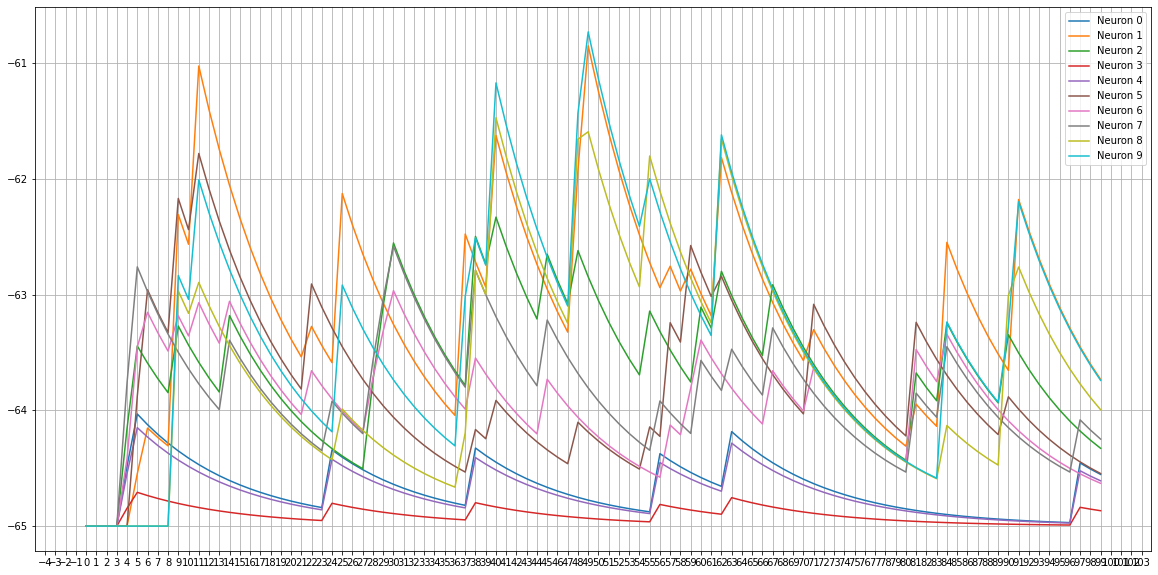

In [18]:
import matplotlib.ticker as plticker
fig,ax=plt.subplots(figsize = (20, 10))
loc = plticker.MultipleLocator(base=1.0)
ax.xaxis.set_major_locator(loc)

for n in range(post_synaptic.n):
    ax.plot(range(time), post_synaptic_monitor.get('v')[:,0,n], label=f"Neuron {n}")

ax.grid(which='major', axis='both', linestyle='-')
ax.legend()

In [19]:
post_synaptic_monitor.get('v')[:,0,:].T[0,:]

tensor([-65.0000, -65.0000, -65.0000, -65.0000, -64.4805, -64.0312, -64.1234,
        -64.2068, -64.2823, -64.3506, -64.4124, -64.4683, -64.5189, -64.5647,
        -64.6061, -64.6436, -64.6775, -64.7082, -64.7360, -64.7611, -64.7838,
        -64.8044, -64.8230, -64.8399, -64.3420, -64.4046, -64.4613, -64.5125,
        -64.5589, -64.6009, -64.6389, -64.6732, -64.7043, -64.7325, -64.7579,
        -64.7810, -64.8018, -64.8207, -64.3254, -64.3896, -64.4477, -64.5003,
        -64.5478, -64.5908, -64.6298, -64.6650, -64.6969, -64.7257, -64.7518,
        -64.7754, -64.7968, -64.8161, -64.8336, -64.8495, -64.8638, -64.8768,
        -64.3739, -64.4335, -64.4874, -64.5362, -64.5803, -64.6203, -64.6564,
        -64.1833, -64.2610, -64.3314, -64.3950, -64.4526, -64.5047, -64.5518,
        -64.5945, -64.6330, -64.6680, -64.6996, -64.7281, -64.7540, -64.7774,
        -64.7986, -64.8178, -64.8351, -64.8508, -64.8650, -64.8779, -64.8895,
        -64.9000, -64.9095, -64.9181, -64.9259, -64.9330, -64.93

In [20]:
post_synaptic_monitor.get('s').sum()

tensor(0)

In [21]:
connection.w

tensor([[0.0000, 0.1377, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0396,
         0.1104],
        [0.0000, 0.0348, 0.0000, 0.0000, 0.0000, 0.0864, 0.0390, 0.0000, 0.0000,
         0.0000],
        [0.0400, 0.0000, 0.0000, 0.0119, 0.0350, 0.0000, 0.0000, 0.0396, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0651, 0.0000, 0.0000, 0.0000, 0.0449, 0.0580, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0578, 0.0000, 0.0000, 0.0329, 0.0000, 0.0000, 0.1215,
         0.0631]])